In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
NUM_CLASSES = 3 # 分類するクラス数
IMG_SIZE = 28 # 画像の1辺の長さ

# 画像のあるディレクトリ
train_img_dirs = ['1','2','3']

In [3]:
# 学習画像データ
train_images = []
# 学習データのラベル
train_labels = []

for i, d in enumerate(train_img_dirs):
    # ./data/以下の各ディレクトリ内のファイル名取得
    files = os.listdir('../data/' + d)
    for f in files:
        # 画像読み込み
        img = cv2.imread('../data/' + d + '/' + f)
        # 1辺がIMG_SIZEの正方形にリサイズ
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        # 1列にして ####この処理はなくす
        #img = img.flatten().astype(np.float32)/255.0
        train_images.append(img)

        # one_hot_vectorを作りラベルとして追加 ######変更
        #tmp = np.zeros(NUM_CLASSES)
        #tmp[i] = 1
        tmp = i
        train_labels.append(tmp)

# numpy配列に変換
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
print(len(train_images), len(train_labels))

30 30


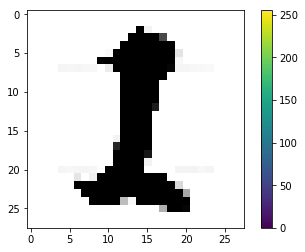

(28, 28, 3)

In [4]:
plt.figure()
plt.imshow(train_images[4])
plt.colorbar()
plt.gca().grid(False)
plt.show()
train_images[4].shape

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np


print(tf.__version__)

1.15.0-dev20190726


In [6]:
#train_images = train_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28,3)),#形状に用注意
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0728 05:36:23.006053 140418456950592 deprecation.py:506] From /home/yuto/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1633: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=100)#epochs=5

W0728 05:36:24.131466 140418456950592 deprecation.py:323] From /home/yuto/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/optimizer_v2/optimizer_v2.py:468: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.


Train on 30 samples
Epoch 1/100
30/30 [==============================] - 0s 1ms/sample - loss: 320.5322 - acc: 0.1333
Epoch 2/100
30/30 [==============================] - 0s 119us/sample - loss: 257.7644 - acc: 0.3000
Epoch 3/100
30/30 [==============================] - 0s 206us/sample - loss: 524.2578 - acc: 0.6000
Epoch 4/100
30/30 [==============================] - 0s 126us/sample - loss: 882.8342 - acc: 0.3667
Epoch 5/100
30/30 [==============================] - 0s 150us/sample - loss: 751.8526 - acc: 0.3667
Epoch 6/100
30/30 [==============================] - 0s 176us/sample - loss: 527.6328 - acc: 0.6333
Epoch 7/100
30/30 [==============================] - 0s 118us/sample - loss: 329.0964 - acc: 0.4667
Epoch 8/100
30/30 [==============================] - 0s 103us/sample - loss: 40.4806 - acc: 0.7333
Epoch 9/100
30/30 [==============================] - 0s 133us/sample - loss: 355.1631 - acc: 0.3000
Epoch 10/100
30/30 [==============================] - 0s 112us/sample - loss: 455.7

Epoch 84/100
30/30 [==============================] - 0s 76us/sample - loss: 0.0741 - acc: 1.0000
Epoch 85/100
30/30 [==============================] - 0s 104us/sample - loss: 0.0741 - acc: 1.0000
Epoch 86/100
30/30 [==============================] - 0s 124us/sample - loss: 0.0740 - acc: 1.0000
Epoch 87/100
30/30 [==============================] - 0s 132us/sample - loss: 0.0740 - acc: 1.0000
Epoch 88/100
30/30 [==============================] - 0s 91us/sample - loss: 0.0739 - acc: 1.0000
Epoch 89/100
30/30 [==============================] - 0s 109us/sample - loss: 0.0739 - acc: 1.0000
Epoch 90/100
30/30 [==============================] - 0s 121us/sample - loss: 0.0738 - acc: 1.0000
Epoch 91/100
30/30 [==============================] - 0s 150us/sample - loss: 0.0738 - acc: 1.0000
Epoch 92/100
30/30 [==============================] - 0s 119us/sample - loss: 0.0737 - acc: 1.0000
Epoch 93/100
30/30 [==============================] - 0s 111us/sample - loss: 0.0737 - acc: 1.0000
Epoch 94/100

1/1 [==============================] - 0s 602us/sample - loss: 547.2230 - acc: 0.0000e+00


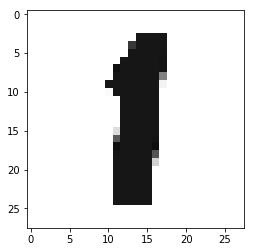

In [17]:
img = cv2.imread('../input_data/input_1.png')
        # 1辺がIMG_SIZEの正方形にリサイズ
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
plt.imshow(img)
test_images = []
test_labels = []
test_images.append(img)
test_labels.append(1)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

In [18]:
np.argmax(predictions[0])

0

In [19]:
test_labels[0]

1

In [13]:
predictions[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

ここ以降コピペ

In [29]:
#データを使いまわす犯罪行為
#本来ここにテスト用データをいれる
test_images = train_images
test_labels = train_labels

test_loss, test_acc = model.evaluate(test_images, test_labels)

20/20 [==============================] - 0s 74us/sample - loss: 586.4744 - acc: 0.2500


In [30]:
predictions = model.predict(test_images)
predictions[3]


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
np.argmax(predictions[3])

2

In [32]:
test_labels[3]

1